In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
init_notebook_mode(connected=True)
import os
print(os.listdir("../input"))

['Accidents_Storyline_example.png', 'IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv', 'IHMStefanini_industrial_safety_and_health_database.csv']


In [21]:
data = pd.read_csv("../input/IHMStefanini_industrial_safety_and_health_database.csv", delimiter=',',
                   header=0, parse_dates = ["Data"], index_col ="Data")

In [22]:
data.shape

(439, 8)

In [23]:
data.head()

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico
Data,,,,,,,,
2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools
2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others
2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others


In [24]:
data.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-06', '2016-01-08',
               '2016-01-10', '2016-01-12', '2016-01-16', '2016-01-17',
               '2016-01-19', '2016-01-26',
               ...
               '2017-06-23', '2017-06-19', '2017-06-22', '2017-06-22',
               '2017-06-29', '2017-07-04', '2017-07-04', '2017-07-05',
               '2017-07-06', '2017-07-09'],
              dtype='datetime64[ns]', name='Data', length=439, freq=None)

In [25]:
datadict = pd.DataFrame(data.dtypes)
datadict

,0
Countries,object
Local,object
Industry Sector,object
Accident Level,object
Potential Accident Level,object
Genre,object
Employee ou Terceiro,object
Risco Critico,object


In [26]:
datadict['MissingVal'] = data.isnull().sum()
datadict

,0,MissingVal
Countries,object,0
Local,object,0
Industry Sector,object,0
Accident Level,object,0
Potential Accident Level,object,0
Genre,object,0
Employee ou Terceiro,object,0
Risco Critico,object,0


In [27]:
datadict['NUnique']=data.nunique()
datadict

,0,MissingVal,NUnique
Countries,object,0,3
Local,object,0,12
Industry Sector,object,0,3
Accident Level,object,0,5
Potential Accident Level,object,0,6
Genre,object,0,2
Employee ou Terceiro,object,0,3
Risco Critico,object,0,34


In [28]:
data.describe(include=['object'])

,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico
count,439,439,439,439,439,439,439,439
unique,3,12,3,5,6,2,3,34
top,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others
freq,263,90,241,328,155,417,189,232


In [29]:
data['Day of the Week'] = data.index.dayofweek
grouped_data = pd.DataFrame(data.groupby(['Countries','Day of the Week']).count())
grouped_data

Local  Industry Sector  Accident Level  \
Countries  Day of the Week                                           
Country_01 0                   30               30              30   
           1                   36               36              36   
           2                   33               33              33   
           3                   39               39              39   
           4                   56               56              56   
           5                   37               37              37   
           6                   32               32              32   
Country_02 0                   21               21              21   
           1                   25               25              25   
           2                   19               19              19   
           3                   26               26              26   
           4                   19               19              19   
           5                   14               14              14   
           6                    8                8               8   
Country_03 0                    2                2               2   
           1                    9                9               9   
           2                   11               11              11   
           3                   14               14              14   
           4                    1                1               1   
           5                    6                6               6   
           6                    1                1               1   

                            Potential Accident Level  Genre  \
Countries  Day of the Week                                    
Country_01 0                                      30     30   
           1                                      36     36   
           2                                      33     33   
           3                                      39     39   
           4                                      56     56   
           5                                      37     37   
           6                                      32     32   
Country_02 0                                      21     21   
           1                                      25     25   
           2                                      19     19   
           3                                      26     26   
           4                                      19     19   
           5                                      14     14   
           6                                       8      8   
Country_03 0                                       2      2   
           1                                       9      9   
           2                                      11     11   
           3                                      14     14   
           4                                       1      1   
           5                                       6      6   
           6                                       1      1   

                            Employee ou Terceiro  Risco Critico  
Countries  Day of the Week                                       
Country_01 0                                  30             30  
           1                                  36             36  
           2                                  33             33  
           3                                  39             39  
           4                                  56             56  
           5                                  37             37  
           6                                  32             32  
Country_02 0                                  21             21  
           1                                  25             25  
           2                                  19             19  
           3                                  26             26  
           4                                  19             19  
           5                               

In [30]:
grouped_data = pd.DataFrame(data.groupby(['Industry Sector','Day of the Week']).count())
grouped_data

Countries  Local  Accident Level  \
Industry Sector Day of the Week                                     
Metals          0                       24     24              24   
                1                       21     21              21   
                2                       23     23              23   
                3                       25     25              25   
                4                       34     34              34   
                5                        6      6               6   
                6                       15     15              15   
Mining          0                       26     26              26   
                1                       37     37              37   
                2                       29     29              29   
                3                       38     38              38   
                4                       41     41              41   
                5                       45     45              45   
                6                       25     25              25   
Others          0                        3      3               3   
                1                       12     12              12   
                2                       11     11              11   
                3                       16     16              16   
                4                        1      1               1   
                5                        6      6               6   
                6                        1      1               1   

                                 Potential Accident Level  Genre  \
Industry Sector Day of the Week                                    
Metals          0                                      24     24   
                1                                      21     21   
                2                                      23     23   
                3                                      25     25   
                4                                      34     34   
                5                                       6      6   
                6                                      15     15   
Mining          0                                      26     26   
                1                                      37     37   
                2                                      29     29   
                3                                      38     38   
                4                                      41     41   
                5                                      45     45   
                6                                      25     25   
Others          0                                       3      3   
                1                                      12     12   
                2                                      11     11   
                3                                      16     16   
                4                                       1      1   
                5                                       6      6   
                6                                       1      1   

                                 Employee ou Terceiro  Risco Critico  
Industry Sector Day of the Week                                       
Metals          0                                  24             24  
                1                                  21             21  
                2                                  23             23  
                3                                  25             25  
                4                                  34             34  
                5                                   6              6  
                6                                  15             15  
Mining          0                                  26             26  
                1                                  37             37  
                2                                  29             29  
                3           

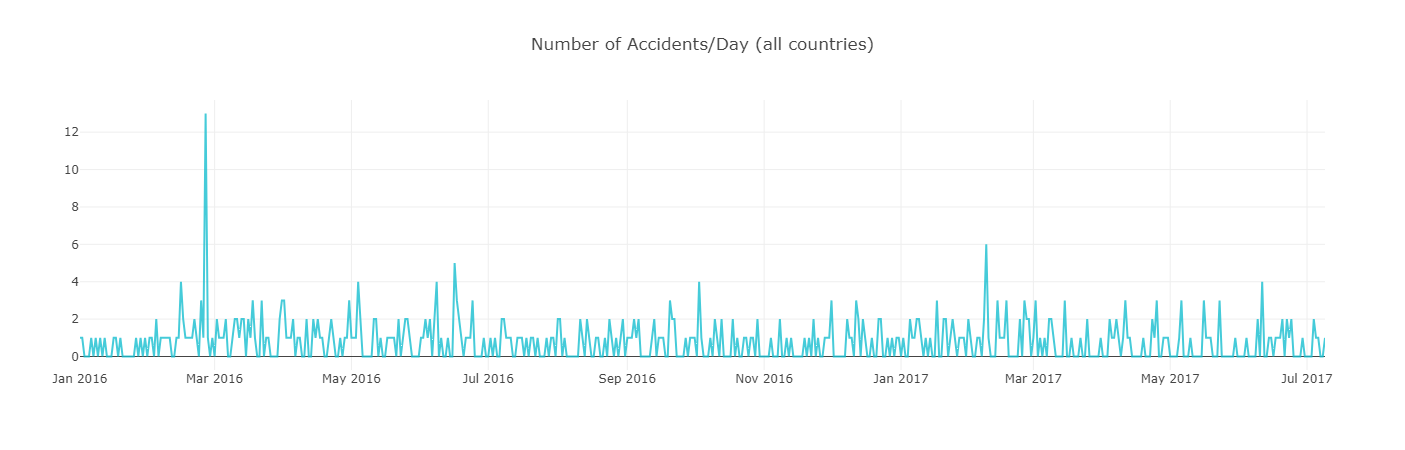

In [31]:
df = data
df = df.Countries.resample('24H').count()

trace_high = go.Scatter(
                x=df.index,
                y=df,
                name = "AAPL High",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

dados= [trace_high]

layout = dict(
    title = "Number of Accidents/Day (all countries)",

)

fig = dict(data=dados, layout=layout)
iplot(fig, filename = "Manually Set Range")

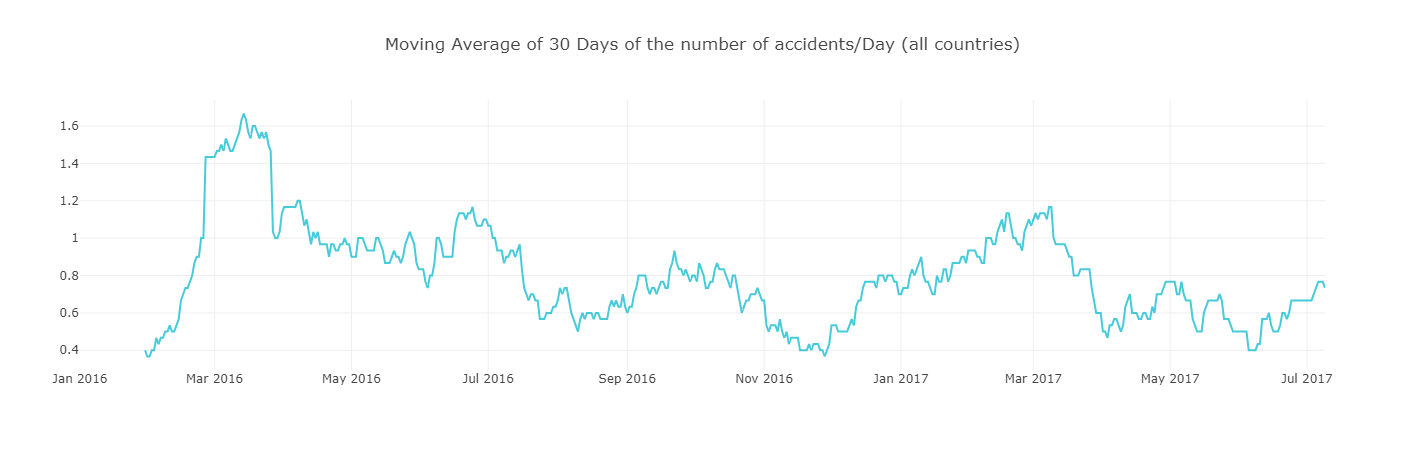

In [32]:
df2 = data
df2 = df2.Countries.resample('24H').count()
temp = df2.rolling(window=30)
b = temp.mean()

trace_high = go.Scatter(
                x=b.index,
                y=b,
                name = "AAPL High",
                line = dict(color = '#17BECF'),
                opacity = 0.8)

dados= [trace_high]

layout = dict(
    title = "Moving Average of 30 Days of the number of accidents/Day (all countries)",

)

fig = dict(data=dados, layout=layout)
iplot(fig, filename = "Manually Set Range")

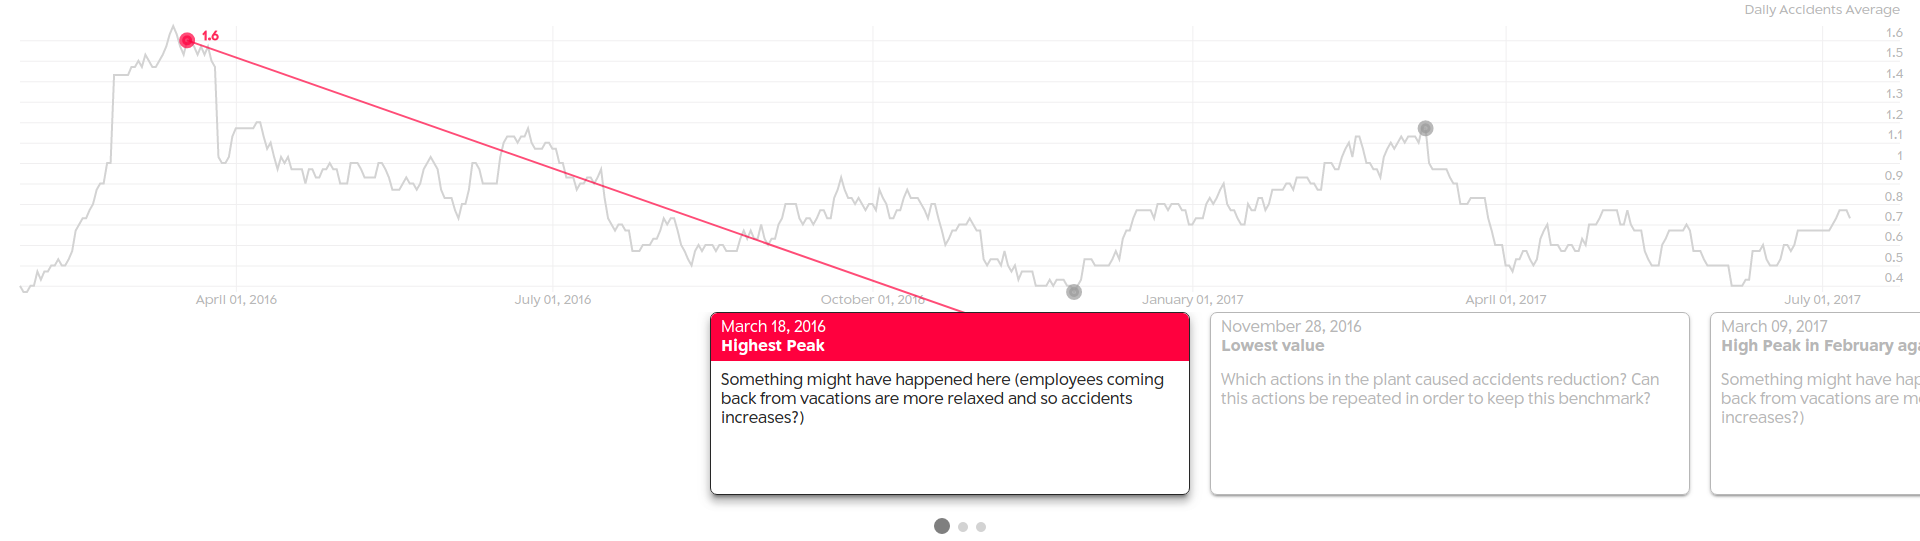

In [33]:
from IPython.display import Image
Image("../input/Accidents_Storyline_example.png")

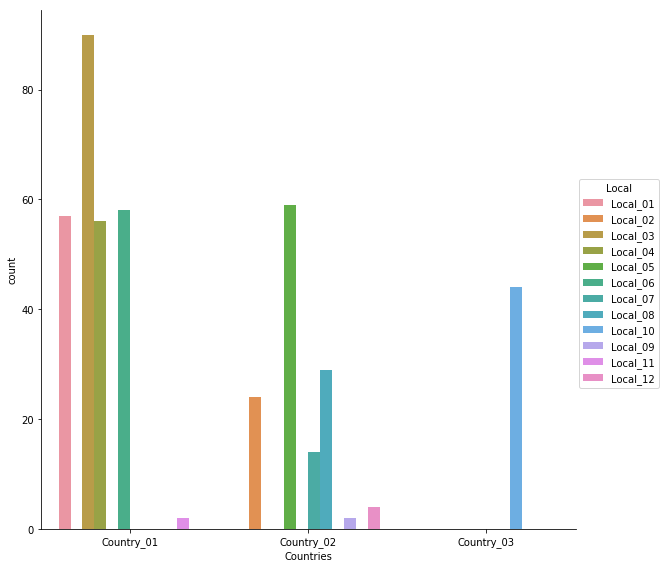

In [34]:
g = sns.factorplot(data=data, kind="count", x="Countries", hue = "Local", size=8, aspect=1)

In [35]:
columns = ['total','cumulative_sum', 'cumulative_perc','demarcation']
paretodf = pd.DataFrame(columns=columns)
paretodf = paretodf.fillna(0)

paretodf['total'] = data["Risco Critico"].value_counts()
#print(paretodf)

paretodf['cumulative_sum'] = paretodf.cumsum()
#print(paretodf)

paretodf['cumulative_perc'] = 100*paretodf.cumulative_sum/paretodf.total.sum()
#print(paretodf)

paretodf['demarcation'] = 80
#print(paretodf)

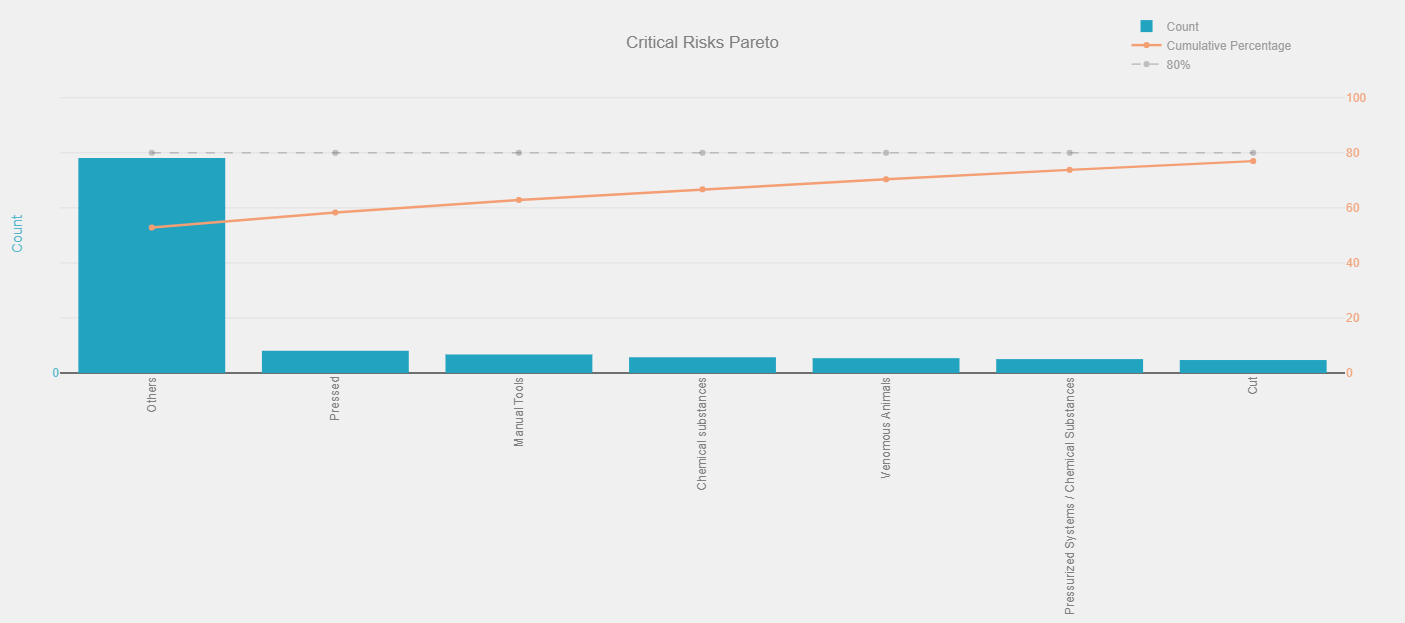

In [36]:
trace1 = Bar(
    x=paretodf.index[0:7],
    y=paretodf.total[0:7],
    name='Count',
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = Scatter(
    x=paretodf.index[0:7],
    y=paretodf.cumulative_perc[0:7],
    name='Cumulative Percentage',
    yaxis='y2',
    line=dict(
        color='rgb(243,158,115)',
        width=2.4
       )
)
trace3 = Scatter(
    x=paretodf.index[0:7],
    y=paretodf.demarcation[0:7],
    name='80%',
    yaxis='y2',
    line=dict(
        color='rgba(128,128,128,.45)',
        dash = 'dash',
        width=1.5
       )
)
dataplot = [trace1, trace2,trace3]
layout = Layout(
    title='Critical Risks Pareto',
    titlefont=dict(
        color='',
        family='',
        size=0
    ),
    font=Font(
        color='rgb(128,128,128)',
        family='Balto, sans-serif',
        size=12
    ),
    width=623,
    height=623,
    paper_bgcolor='rgb(240, 240, 240)',
    plot_bgcolor='rgb(240, 240, 240)',
    hovermode='compare',
    margin=dict(b=250,l=60,r=60,t=65),
    showlegend=True,
       legend=dict(
          x=.83,
          y=1.3,
          font=dict(
            family='Balto, sans-serif',
            size=12,
            color='rgba(128,128,128,.75)'
        ),
    ),
    annotations=[ dict(
                  text="Cumulative Percentage",
                  showarrow=False,
                  xref="paper", yref="paper",
                  textangle=90,
                  x=1.100, y=.75,
                  font=dict(
                  family='Balto, sans-serif',
                  size=14,
                  color='rgba(243,158,115,.9)'
            ),)],
    xaxis=dict(
      tickangle=-90
    ),
    yaxis=dict(
        title='Count',
        range=[0,300],
      tickfont=dict(
            color='rgba(34,163,192,.75)'
        ),
      tickvals = [0,6000,12000,18000,24000,30000],
        titlefont=dict(
                family='Balto, sans-serif',
                size=14,
                color='rgba(34,163,192,.75)')
    ),
    yaxis2=dict(
        range=[0,101],
        tickfont=dict(
            color='rgba(243,158,115,.9)'
        ),
        tickvals = [0,20,40,60,80,100],
        overlaying='y',
        side='right'
    )
)

fig = dict(data=dataplot, layout=layout)
iplot(fig)